In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

x = [63, 64, 66, 69, 69, 71, 71, 72, 73, 75]
x = np.array(x)

y = [127, 121, 142, 157, 162, 156, 169, 165, 181, 208]
y = np.array(y)

data = pd.DataFrame({'xi': x, 'yi': y})

- Scale data 

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/358923abc154221bb5022fc329061f6fc4dcc69f)

In [ ]:
x_scaled = (x - x.min()) / (x.max() - x.min())
x, x_scaled

(array([63, 64, 66, 69, 69, 71, 71, 72, 73, 75]),
 array([0.        , 0.08333333, 0.25      , 0.5       , 0.5       ,
        0.66666667, 0.66666667, 0.75      , 0.83333333, 1.        ]))

In [ ]:
from sklearn.neural_network import MLPRegressor
mlpreg = MLPRegressor(activation='relu',max_iter=10000,hidden_layer_sizes=(1000,))

In [ ]:
mlpreg.fit(x_scaled.reshape(-1,1),y)

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPRegressor(hidden_layer_sizes=(1000,), max_iter=10000)

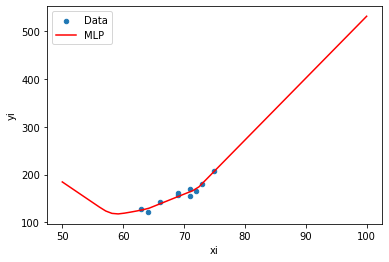

In [ ]:
x_mlp = np.linspace(data['xi'].min(), data['xi'].max())
x_mlp = np.linspace(50, 100)
x_mlp_scaled = (x_mlp - x.min()) / (x.max() - x.min())
y_mlp = mlpreg.predict(x_mlp_scaled.reshape(-1, 1))
data.plot.scatter('xi', 'yi', label='Data')
plt.plot(x_mlp, y_mlp, 'r', label='MLP')
l=plt.legend()

In [ ]:
# Import model
from sklearn.linear_model import LinearRegression

# Instance model
lin_reg = LinearRegression()

lin_reg.fit(x.reshape(-1,1),y)

LinearRegression()

In [ ]:
lin_reg.coef_, lin_reg.intercept_

(array([6.13758146]), -266.53439536567697)

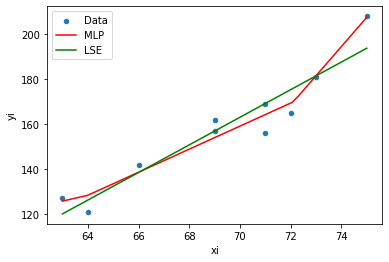

In [ ]:
x_mlp = np.linspace(data['xi'].min(), data['xi'].max())
x_mlp_scaled = (x_mlp - x.min()) / (x.max() - x.min())
y_mlp = mlpreg.predict(x_mlp_scaled.reshape(-1, 1))

y_lin_reg = lin_reg.coef_*x_mlp + lin_reg.intercept_
data.plot.scatter('xi', 'yi', label='Data')
plt.plot(x_mlp, y_mlp, 'r', label='MLP')
plt.plot(x_mlp, y_lin_reg, 'g', label='LSE')

l=plt.legend()

In [ ]:
((mlpreg.predict(x_scaled.reshape(-1, 1))-y)**2).mean()

25.056118040029624

In [ ]:
(((lin_reg.coef_*x + lin_reg.intercept_) - y)**2).mean()

59.738595220854634

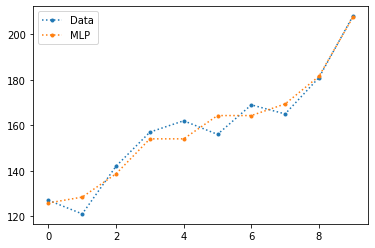

In [ ]:
plt.plot(y, ':.', label='Data')
plt.plot(mlpreg.predict(x_scaled.reshape(-1, 1)), ':.', label="MLP")
plt.legend()

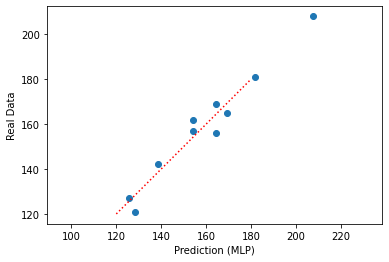

In [ ]:
plt.scatter(mlpreg.predict(x_scaled.reshape(-1, 1)), y)
plt.axis("equal")
plt.xlabel('Prediction (MLP)')
plt.ylabel('Real Data')
plt.plot([120,180], [120,180], ':r')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=cce3455d-da08-4c10-a6fe-39f2a30c6a51' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>